# Exploratoring PISA Data

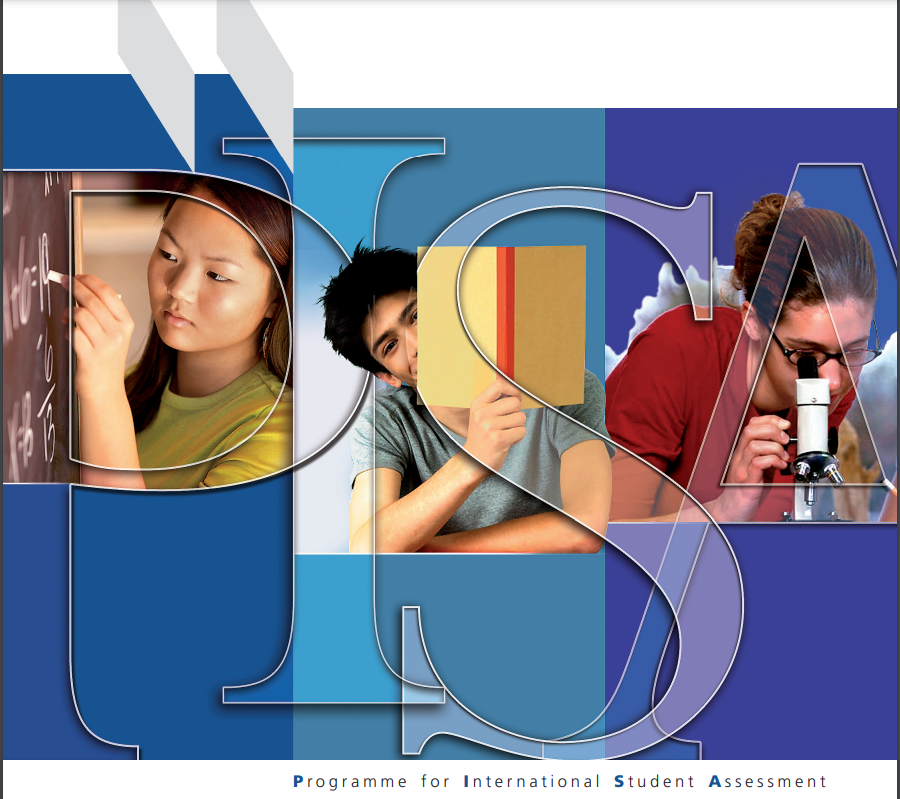

# Table of Contents
***

- [Introduction](#intro)
- [Importing Libraries](#lib)
- [Preliminary Wrangling](#wrangling)
    - [Data Gathering](#gather)
    - [Data Assessment](#assess)
    - [Data Cleaning](#data-cleaning)
    - [Store Dataset](#store)
- [Exploratory Data Analysis](#explore)
   -   [Univariate Exploration](#uni)
   -   [Bivariate Exploration](#bi)
   -   [Multivariate Exploration](#multi)
- [Conclusion](#con)
- [Limitations](#lim)
- [Recommendations](#recom)

# Introduction
<a id="intro"></a>
***

 Introductory note goes here

# Importing the Essential Libraries
<a id="lib"></a>
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


# allows graps to be displayed
%matplotlib inline


# Preliminary Wrangling
<a id="wrangling"></a>
***
It is very important to gather, assess and clean the data to be used for this project. The data will be gathered programmatically, while visual and programmatic assessments will be done to identify areas in the data that need to be clean before the analysis begins proper


In [2]:
# get the PSA zip folder from the internet via the link
if False:
    pisa_url="https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip"
    response=requests.get(pisa_url)

In [3]:

if False:
    # save zip folder to local machine
    file_name=pisa_url.split('/')[-1]
    with open(file_name,mode='wb') as file:
        file.write(response.content)
    
    #Extract all the contnets of the zip folder
    with ZipFile(file_name) as pisa_zip:
        pisa_zip.extractall()

#read data into pandas
pisa=pd.read_csv('pisa2012.csv',encoding='WINDOWS-1252', low_memory=False)

In [4]:
# get data basic information

pisa.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


> The summary information about the data frame is not fully displayed possibly because the columns are too large for pandas column display settings
> a keen look at the output shows there are 636 column entries and 485,490 rows. The dataset is large as seen, meaning there is a wealth of information surrounding the success of a student in school that has been collected

#### Selecting Attributes of Interest
The dataset has enough information about the family, school, students' personally and many other information surrounding students in their end of compulsory education year. It is best to preview and assess the data in spreadsheet applications like Excel or Google sheet.

__Report of Preliminary Visual Assessment in Excel__
- The columns have unique codings that are not descriptive at all
- Data dictionary can only be used to understand the the attributes
- Note all attributes will feature in this project, a few selected columns will do

__Few Selected Attributes__

- __CNT__: _denotes nationality of each participating student

- __ST04Q01:__ _gender of students_

- __ST03Q02__: _birthyear of students

- __REPEAT:__ _whether student repeated or not_

- __ST09Q01:__ _truancy in school_

- __ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06:__ _columns denote mother, father, brother, sister, grandparents and others are home respectively_         

- __ST26Q01,ST26Q02,ST26Q03:__ _Columns denote student posseses desk, a room and a study place respectively_

- __ST26Q07",ST26Q08,ST26Q09:__ _Columns denote whether students possess literature,poetry, and art materials respectively_

- __ST26Q10,ST26Q11,ST26Q12:__ _Columns denote whether students possess text books, techical textbooks and dictionary respectively_

- __IC02Q01,IC02Q02,IC02Q03:__ _Columns denote whether the school students attend possess desktop,portable laptop and tablet respectively_

- __IC10Q09,IC10Q06:__ _Columns denote whether student participate in group work and simulation in school

- __EC07Q01:__ _mother's language_

- __PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH:__ _Columns denote plausible students' scores in Mathematics_

- __PV1READ,PV2READ,PV3READ,PV3READ,PV4READ,PV5READ:__ _Columns denote plausible students'scores in Reading_

- __PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE:__ _Columns denote plausible students'scores in Science_

The above columns have been selected because the aim of this project is to understand what factors have high impact on academic achievements

# Data Assessment
<a id="assess"><a/>
***
After selecting the columns of interest, the next is to assess them for quality and tidiness issues before proceeding to clean. However, the codes associated with different columns are not good for the eye at the moment. It is necessary to rename them with names that are descriptive for easy assessment, documentation, and cleaning

In [5]:
#list columns to select
columns=[ "CNT","ST04Q01","ST03Q02","REPEAT","ST09Q01",#|country|gender|birthyear|repeat|truancy|
         "ST11Q01","ST11Q02","ST11Q03",#|motherishome|father is home|brother is home|
         "ST11Q04","ST11Q05","ST11Q06",#|sister is home|grandparent is home|others are home|
         "ST26Q01","ST26Q02","ST26Q03",#|posses desk|possess room|possess study place
         "ST26Q07","ST26Q08","ST26Q09",#|possess literature|possess poetry|possess art |>>>materials
         "ST26Q10","ST26Q11","ST26Q12",#|possess textbooks|possess technical textbooks|possess dictionary|
         "IC02Q01","IC02Q02","IC02Q03",#|desktop is school|port laptop in school|tablet in school|
         "IC10Q09","IC10Q06",#|school internet access|group work|
         "EC07Q01",#|first language learned|mother's language|ICT at home|ICT resources|
         "PV1MATH","PV2MATH",#|ICT in school|plausible math score 1|plausible math score 2
         "PV3MATH","PV4MATH","PV5MATH",#|plausible math score 3|plausible math score 4|plausible math score 5
         "PV1READ","PV2READ","PV3READ",#|plausible reading score 1|plausible reading score 2|plausible reading score 3
         "PV4READ","PV5READ","PV1SCIE",#|plausible reading score 4|plausible reading score 5|plausible science score 1
         "PV2SCIE","PV3SCIE","PV4SCIE",#|plausible science score 2|plausible science score 3|plausible science score 4
         "PV5SCIE"#|plausible science score 1
        ]
#create name dictionary for the columns
column_dict={ "CNT":"country","ST04Q01":"gender","ST03Q02":"birth_year",
             "REPEAT":"repeat_class","ST09Q01":"truancy",
             "ST11Q01":"mother_is_home","ST11Q02":"father_is_home",
             "ST11Q03":"brother_is_home","ST11Q04":"sister_is_home",
             "ST11Q05":"grandparent_is_home","ST11Q06":"others_are_home",
             "ST26Q01":'own_desk',"ST26Q02":"own_room","ST26Q03":"own_study_place",
             "ST26Q07":"literature","ST26Q08":"possess_poetry_mat","ST26Q09":"possess_art_mat",
             "ST26Q10":"possess_textbooks","ST26Q11":"possess_tech_textbook","ST26Q12":"possess_dictionary",
             "IC02Q01":"schl_desktop","IC02Q02":"schl_port_laptop","IC02Q03":"schl_tablet",
             "IC10Q09":"group_work","IC10Q06":"schl_simulation",
             "EC07Q01":"mother_lang",
             "PV1MATH":"p_math1","PV2MATH":"p_math2",
             "PV3MATH":"p_math3","PV4MATH":"p_math4","PV5MATH":"p_math5",
             "PV1READ":"p_read1","PV2READ":"p_read2",
             "PV3READ":"p_read3","PV4READ":"p_read4",
             "PV5READ":"p_read5","PV1SCIE":"p_science1","PV2SCIE":"p_science2",
             "PV3SCIE":"p_science3","PV4SCIE":"p_science4","PV5SCIE":"p_science5"
            }


In [6]:
#keep original data frame for reference purpose
df_pisa=pisa.copy()

#filter out excess columns from dataset 
df_pisa=df_pisa[columns]


In [7]:
df_pisa.head(2)

,CNT,ST04Q01,ST03Q02,REPEAT,ST09Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,Yes,Yes,NaN,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,NaN,Yes,NaN,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116


> Raname the columns first

In [8]:
df_pisa.rename(column_dict,axis=1,inplace=True)
print("Number of duplicate records: {}".format(df_pisa.duplicated().sum()))
df_pisa.sample(6)

Number of duplicate records: 0


,country,gender,birth_year,repeat_class,truancy,mother_is_home,father_is_home,brother_is_home,sister_is_home,grandparent_is_home,...,p_read1,p_read2,p_read3,p_read4,p_read5,p_science1,p_science2,p_science3,p_science4,p_science5
182712,Finland,Female,1996,Did not repeat a <grade>,None,Yes,Yes,Yes,Yes,No,...,502.1668,551.4140,484.6920,541.8823,503.7554,588.1574,587.2249,473.4614,523.8157,583.4950
193485,United Kingdom,Female,1997,Did not repeat a <grade>,None,Yes,No,Yes,No,No,...,422.6564,396.4441,423.4507,408.3588,434.5710,426.9302,361.6561,404.5505,457.7023,449.3100
389530,Qatar,Male,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,255.7220,185.9528,200.3878,247.7026,206.8034,282.3014,257.1242,321.4659,297.2212,278.5714
164679,Spain,Male,1996,Did not repeat a <grade>,None,Yes,Yes,Yes,No,Yes,...,470.9641,475.7758,458.9349,479.7855,421.2435,530.3432,527.5457,558.3178,548.9929,521.0183
236949,Israel,Male,1996,Did not repeat a <grade>,None,NaN,NaN,NaN,NaN,NaN,...,522.2886,536.7236,514.2691,524.6944,514.2691,512.6259,496.7736,531.2756,529.4107,487.4487
415641,Romania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,Yes,NaN,NaN,...,418.6848,433.7767,412.3303,479.8467,391.6783,398.8624,395.1324,402.5923,449.2167,411.9172


In [9]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                485490 non-null  object 
 1   gender                 485490 non-null  object 
 2   birth_year             485490 non-null  int64  
 3   repeat_class           461117 non-null  object 
 4   truancy                479131 non-null  object 
 5   mother_is_home         460559 non-null  object 
 6   father_is_home         441036 non-null  object 
 7   brother_is_home        400076 non-null  object 
 8   sister_is_home         390768 non-null  object 
 9   grandparent_is_home    348180 non-null  object 
 10  others_are_home        337638 non-null  object 
 11  own_desk               473079 non-null  object 
 12  own_room               469693 non-null  object 
 13  own_study_place        472020 non-null  object 
 14  literature             465860 non-nu

>### Assessment Summary
>The columns are presently 41 in total which means that there exist some limitations of vissually assessing the dataset with pandas alone. Excel is the choice for this purpose.

> __Notable Observation:__
>- Difficult to make sense of the column names
>- Some columns contain empty entries
>- Columns relating to wether family memebers are home will be transformed to a single column denoting whether home support is available to child
>- Columns related to school materials in possess will be transformed to a single column, highlighting the number possessed/total materials
>- Age will be calculated and it should replace birth years as columns are pretty large
>__Programamtic:__
>- No duplicate record

# Data cleaning
***
<a id="data-cleaning"></a>

In [10]:
#make copy of dataset
df=df_pisa.copy()

#### Useful Defined Functions
Each comes in handy during the data cleaning process

In [11]:
def concat_columns(df,col_index,var_name):
    """This function adds a new column containing the
        concatinated entries of selected columns indexes
        as single strings at the row level.
    """
    df[var_name]=df.iloc[:,col_index[0]].astype(str)
    for i in col_index[1:]:
        df[var_name]+=df.iloc[:,i].astype(str)
    print("-"*120+"\n")
    print("See the columns that were concatinated:\n{}\n".format(list(df.iloc[:,np.r_[col_index]])))
    print("-"*120)
    
    return df

def delete_col(df,var):
    """Function drop and prints out the specified columns
    """
    df.drop(var,axis=1,inplace=True)
    print("-"*120)
    print("The following columns have been dropped:\n{}".format(var))
    print("-"*120)
    
def display_info(iloc,loc):
    print("*"*120)
    print("Idexes of columns:",iloc)
    print("Column names:",loc)
    print("*"*120)

#### 1. Tranform columns carrying information about an adult being at home to a single column 
- Fill in `present` if at least 1 of the 6 entries is a YES
- Fill in `absent` if not a Yes response but at least a No
- Fill in `nan` to replace no response at all

In [12]:
column_indexes=list(np.arange(5,11))
col_loc=list(df.iloc[:,np.r_[column_indexes]])
display_info(column_indexes,col_loc)

************************************************************************************************************************
Idexes of columns: [5, 6, 7, 8, 9, 10]
Column names: ['mother_is_home', 'father_is_home', 'brother_is_home', 'sister_is_home', 'grandparent_is_home', 'others_are_home']
************************************************************************************************************************


In [13]:
#create new column containing cocatinated strings of yes, no and or nan
df=concat_columns(df,column_indexes,"home_support")

------------------------------------------------------------------------------------------------------------------------

See the columns that were concatinated:
['mother_is_home', 'father_is_home', 'brother_is_home', 'sister_is_home', 'grandparent_is_home', 'others_are_home']

------------------------------------------------------------------------------------------------------------------------


In [14]:
df.head(3)

,country,gender,birth_year,repeat_class,truancy,mother_is_home,father_is_home,brother_is_home,sister_is_home,grandparent_is_home,...,p_read2,p_read3,p_read4,p_read5,p_science1,p_science2,p_science3,p_science4,p_science5,home_support
0,Albania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,Yes,Yes,NaN,...,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,YesYesYesYesnannan
1,Albania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,NaN,Yes,NaN,...,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,YesYesnanYesnannan
2,Albania,Female,1996,Did not repeat a <grade>,None,Yes,Yes,No,Yes,No,...,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,YesYesNoYesNoNo


In [15]:
# replace concatinated strings with yes, no or nan as appropriate
convert = lambda x : "present" if "Yes" in x else ("absent" if "No" in x  else np.nan)
df['home_support']=df['home_support'].apply(convert)

#delete parent columns
delete_col(df,col_loc)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['mother_is_home', 'father_is_home', 'brother_is_home', 'sister_is_home', 'grandparent_is_home', 'others_are_home']
------------------------------------------------------------------------------------------------------------------------


#### 2. Transform columns related to whether student have study space or not
>##### Coding student study space responses
>- 1 means the student has a study space
>- 0 means the student has no study space
>- nan means no entry at all

In [16]:
#display the columns' indexes and location concerned
study_spaces_index=list(np.arange(5,8))
study_spaces_loc=list(df.iloc[:,np.r_[study_spaces_index]])
display_info(study_spaces_index,study_spaces_loc)

************************************************************************************************************************
Idexes of columns: [5, 6, 7]
Column names: ['own_desk', 'own_room', 'own_study_place']
************************************************************************************************************************


In [17]:
#create a column containing concatinated string of study space columns
df=concat_columns(df,study_spaces_index,"study_space")

------------------------------------------------------------------------------------------------------------------------

See the columns that were concatinated:
['own_desk', 'own_room', 'own_study_place']

------------------------------------------------------------------------------------------------------------------------


In [18]:
df.iloc[:3,7:]

,own_study_place,literature,possess_poetry_mat,possess_art_mat,possess_textbooks,possess_tech_textbook,possess_dictionary,schl_desktop,schl_port_laptop,schl_tablet,...,p_read3,p_read4,p_read5,p_science1,p_science2,p_science3,p_science4,p_science5,home_support,study_space
0,Yes,No,Yes,No,Yes,No,Yes,NaN,NaN,NaN,...,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,present,YesNoYes
1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,present,YesYesYes
2,Yes,Yes,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,...,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,present,YesYesYes


In [19]:
convert = lambda x : 1 if "Yes" in x else (0 if "No" in x  else np.nan)
df['study_space']=df['study_space'].apply(convert)
# delete parent columns of study spaces
delete_col(df,study_spaces_loc)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['own_desk', 'own_room', 'own_study_place']
------------------------------------------------------------------------------------------------------------------------


#### 3. Compressed columns relating to school materials possessed by student to a single column
>__To Do:__ 
>- Count the number of materials each student has by counting the number of all "Yes" responses
>- Delete ancestral columns relating to study materials

In [20]:
#display indexes and location concerned
material_indexes=np.arange(5,11)
material_loc=list(df.iloc[:,5:11])
display_info(material_indexes,material_loc)

************************************************************************************************************************
Idexes of columns: [ 5  6  7  8  9 10]
Column names: ['literature', 'possess_poetry_mat', 'possess_art_mat', 'possess_textbooks', 'possess_tech_textbook', 'possess_dictionary']
************************************************************************************************************************


In [21]:
###concatinate entries is material indexes to a sing string in a new column
df=concat_columns(df,material_indexes,"num_study_material")

------------------------------------------------------------------------------------------------------------------------

See the columns that were concatinated:
['literature', 'possess_poetry_mat', 'possess_art_mat', 'possess_textbooks', 'possess_tech_textbook', 'possess_dictionary']

------------------------------------------------------------------------------------------------------------------------


In [22]:
df.num_study_material.value_counts()

YesYesYesYesYesYes    92697
NoNoNoYesNoYes        34007
NoNoYesYesYesYes      30693
NoNoNoYesYesYes       26000
YesYesNoYesYesYes     24737
                      ...  
NonannannanNoYes          1
YesnanNoNoYesNo           1
nanNonannanYesYes         1
YesnanNoYesYesnan         1
YesNoYesnanNoNo           1
Name: num_study_material, Length: 593, dtype: int64

In [23]:
##count the number of study materials
df['num_study_material']=df['num_study_material'].apply(lambda x:np.nan if x.count("nan")==6 else x.count("Y"))
df['num_study_material'].value_counts(dropna=False)

4.0    99278
6.0    92697
3.0    91008
5.0    89148
2.0    64540
1.0    32569
NaN     9174
0.0     7076
Name: num_study_material, dtype: int64

In [24]:
#delete study material ancestral columns
delete_col(df,material_loc)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['literature', 'possess_poetry_mat', 'possess_art_mat', 'possess_textbooks', 'possess_tech_textbook', 'possess_dictionary']
------------------------------------------------------------------------------------------------------------------------


#### 3. Tranform columns that has to do with whether a student can access computer in his school or not
>##### Coding student access to computer in their school. Hence, 1 in replaces of "Yes and I use it"
>- 1 means the students have access to computer in their school. Hence, 0 replaces of "No" and "Yes but I don't have access to it"
>- 0 means the students have no access to computer in their school
>- nan means no response was given at all


In [25]:
df.iloc[:,5:8].value_counts()

schl_desktop             schl_port_laptop         schl_tablet            
Yes, and I use it        No                       No                         108463
                         Yes, and I use it        No                          37146
Yes, but I don’t use it  No                       No                          36188
No                       No                       No                          27100
Yes, and I use it        Yes, but I don’t use it  No                          20025
Yes, but I don’t use it  Yes, but I don’t use it  No                          12302
Yes, and I use it        Yes, and I use it        Yes, and I use it            9706
Yes, but I don’t use it  Yes, and I use it        No                           7576
No                       Yes, and I use it        No                           5919
Yes, and I use it        Yes, but I don’t use it  Yes, but I don’t use it      4995
Yes, but I don’t use it  Yes, but I don’t use it  Yes, but I don’t use it      4650
Ye

In [26]:
#displace record indexes and colocations
computer_access_index=np.arange(5,8)
computer_access_loc=list(df.iloc[:,5:8])
display_info(computer_access_index,computer_access_loc)

************************************************************************************************************************
Idexes of columns: [5 6 7]
Column names: ['schl_desktop', 'schl_port_laptop', 'schl_tablet']
************************************************************************************************************************


In [27]:
###concatinate entries is material indexes to a sing string in a new column
df=concat_columns(df,computer_access_index,"computer_access")

------------------------------------------------------------------------------------------------------------------------

See the columns that were concatinated:
['schl_desktop', 'schl_port_laptop', 'schl_tablet']

------------------------------------------------------------------------------------------------------------------------


In [28]:
def check_string(s):
    """Function replaces strings with the specified condition
    """
    if "Yes, and I use it" in s:
        s=1
    elif "Yes, but I don’t use it" in s:
        s=0
    elif "No" in s:
        s=0
    elif "nannannan" in s:
        s=np.nan
    return s
##apply function to replace strings
df["computer_access"]=df["computer_access"].apply(check_string)
df["computer_access"].value_counts()

1.0    212555
0.0     85719
Name: computer_access, dtype: int64

In [29]:
#delete ancestral columns of computer access
delete_col(df,computer_access_loc)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['schl_desktop', 'schl_port_laptop', 'schl_tablet']
------------------------------------------------------------------------------------------------------------------------


#### 4. Code the responses in group_work and schl_simulation
######  _response codes_
- 0 stands for "Never or hardly ever"  
- 1 stands for "Once or twice a month"     
- 2 stands for "Once or twice a week"    
- 3 stands for "Almost every day"          
- 4 stands for "Every day"


__NB:__ The numerical substitutes for these responses are sort of ordinal variables since there is an inherent order attached to them. A student who participates in group work everyday is has a higher number than another student who never or hardly participates in group work or simulation in school

In [30]:
#define a response dictionary
response_dict={"Never or hardly ever":0,
"Once or twice a month":1,
"Once or twice a week":2,
"Almost every day":3,
"Every day":4}
#replace the responses according to the dictionary
df.schl_simulation.replace(response_dict,inplace=True)
df.group_work.replace(response_dict,inplace=True)
df.schl_simulation.value_counts(dropna=False)

0.0    222109
NaN    195222
1.0     34623
2.0     20693
3.0      7713
4.0      5130
Name: schl_simulation, dtype: int64

In [31]:
df.group_work.value_counts(dropna=False)

NaN    194675
0.0    154027
1.0     70340
2.0     43426
3.0     14533
4.0      8489
Name: group_work, dtype: int64

#### 5. Code the responses in mother_lang column
The responses in the column will be coded has follow for easy manipulation during exploratory analysis
- Mostly heritage language as HL                              
- Mostly test language  as TL                                 
- About equally heritage language and test language as HL_TL 
- Not applicable as NAL                                       
- NaN remains nan


In [32]:
df.mother_lang.replace({"Mostly <heritage language> ":"HL",
"Mostly <test language>":"TL",
"About equally <heritage language> and <test language>":"HL_TL",
"Not applicable": "NAL"},inplace=True)
df.mother_lang.value_counts()

HL       23093
TL       13267
HL_TL     6092
NAL       1560
Name: mother_lang, dtype: int64

#### 6. Code responses in repeat column
- Did not repeat a grade as DRG (did not repeat grade)
- Repeated a RG (repeated grade)

In [33]:
## replace text for easy manipulation
df.repeat_class.replace({"Did not repeat a <grade>":"DRG",
    "Repeated a <grade>":"RG"},inplace=True)
df.repeat_class.value_counts()

DRG    393558
RG      67559
Name: repeat_class, dtype: int64

#### 7. Code responses in truancy column
The responses will be replaced as shown below. Meanwhile no response at all is treated as nan
- None with AT
- One or two times with FT
- Three or four times with ST
- Five or more times

In [34]:
df.truancy.value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: truancy, dtype: int64

In [35]:
df['truancy']=df.truancy.str.strip().replace({
    "None":"AT",
    "One or two times":"FT",
    "Three or four times":"ST",
    "Five or more times":"MT"
    
})
df.truancy.value_counts(dropna=False)

AT     385998
FT      75969
ST      10882
NaN      6359
MT       6282
Name: truancy, dtype: int64

#### 8. Make corrections to the country column
The country colums is desiganted to occupy the name of  countries . However, some state in the USA were written as leading text while the main country name is contained in parenthesis. For consistency Perm(Russian Federation) should also be left as Russia

In [36]:
df.country.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: country, Length: 68, dtype: int64

In [37]:
#replace the entries accordingly
df.country.replace({"Perm(Russian Federation)":"Russia",
    "Connecticut (USA)":"USA",
        "Massachusetts (USA)":"USA",
            "Florida (USA)":"USA"},inplace=True)
df.country.value_counts()

Mexico           33806
Italy            31073
Spain            25313
Canada           21544
Brazil           19204
                 ...  
Latvia            4306
New Zealand       4291
Iceland           3508
Russia            1761
Liechtenstein      293
Name: country, Length: 66, dtype: int64

#### 9. Replace birth year column with age of student
Because the data was collected in 2012, the birth year will be substracted from 2012

In [38]:
## calculate the ages of students as at 2012 
df["age"]=2012-df.birth_year
## drop parent column, birthyear
delete_col(df,"birth_year")

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
birth_year
------------------------------------------------------------------------------------------------------------------------


#### 10. Compute the average plausible values in each of Math, Reading, and Science
Each module has 5 plausible scores

In [39]:
def avg_plausible_score(df,cols,name):
    """ compute the mean of numerical columns in a data frame
    """
    df[name]=(df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]])/5
    return df

In [40]:
# get and the dsplay indexes of the scores
math_cols=list(df.iloc[:,7:12])
read_cols=list(df.iloc[:,12:17])
sci_cols=list(df.iloc[:,17:22])
cols=[math_cols,read_cols,sci_cols]
for el in cols:
    print("-"*130)
    print(el)
    print("-"*130)

----------------------------------------------------------------------------------------------------------------------------------
['p_math1', 'p_math2', 'p_math3', 'p_math4', 'p_math5']
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
['p_read1', 'p_read2', 'p_read3', 'p_read4', 'p_read5']
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
['p_science1', 'p_science2', 'p_science3', 'p_science4', 'p_science5']
----------------------------------------------------------------------------------------------------------------------------------


In [41]:
## calculate mean plausible for each module
df=avg_plausible_score(df,math_cols,'math_avg')
df=avg_plausible_score(df,read_cols,'read_avg')
df=avg_plausible_score(df,sci_cols,'sci_avg')

In [42]:
#delete math plausible scores
delete_col(df,math_cols)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['p_math1', 'p_math2', 'p_math3', 'p_math4', 'p_math5']
------------------------------------------------------------------------------------------------------------------------


In [43]:
#delete read plausible scores
delete_col(df,read_cols)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['p_read1', 'p_read2', 'p_read3', 'p_read4', 'p_read5']
------------------------------------------------------------------------------------------------------------------------


In [44]:
#delete science plausible scores
delete_col(df,sci_cols)

------------------------------------------------------------------------------------------------------------------------
The following columns have been dropped:
['p_science1', 'p_science2', 'p_science3', 'p_science4', 'p_science5']
------------------------------------------------------------------------------------------------------------------------


#### 13. Compute the Weighted Average for the three scores

In [45]:
df['weighted_avg']=(df['math_avg']+df['read_avg']+df['sci_avg'])/3

In [46]:
print("New number of columns is: {}".format(df.shape[1]))
print("New number of rows is: {}".format(df.shape[0]))
print("-"*50)
df.head()

New number of columns is: 16
New number of rows is: 485490
--------------------------------------------------


,country,gender,repeat_class,truancy,group_work,schl_simulation,mother_lang,home_support,study_space,num_study_material,computer_access,age,math_avg,read_avg,sci_avg,weighted_avg
0,Albania,Female,DRG,AT,NaN,NaN,NaN,present,1.0,3.0,NaN,16,366.18634,261.01424,371.91348,333.038020
1,Albania,Female,DRG,AT,NaN,NaN,NaN,present,1.0,6.0,NaN,16,470.56396,384.68832,478.12382,444.458700
2,Albania,Female,DRG,AT,NaN,NaN,NaN,present,1.0,5.0,NaN,16,505.53824,405.18154,486.60946,465.776413
3,Albania,Female,DRG,AT,NaN,NaN,NaN,present,1.0,5.0,NaN,16,449.45476,477.46376,453.97240,460.296973
4,Albania,Female,DRG,AT,NaN,NaN,NaN,present,1.0,5.0,NaN,16,385.50398,256.01010,367.15778,336.223953


#### 11. Remove all Null values
Although not necessary, the null value will be dropped. Here is the reason: To achieve a 99% confidence level and accommodate a 1% margin of error with the number of records (485,490) in the data, the sample size required as calculated with an online [Sample size calculator](https://www.calculator.net/sample-size-calculator.html?type=1&cl=99&ci=1&pp=50&ps=485490&x=41&y=19) is 16,090. Removing the null values the number of records that would be left is 30,474 which is very much enough to yield a similar result 99% of the time if similar procedures were adopted

In [47]:
#remove all nan
df.dropna(inplace=True)
## reset indexes of the data frame
df.reset_index(drop=True,inplace=True)
df.head(8)

,country,gender,repeat_class,truancy,group_work,schl_simulation,mother_lang,home_support,study_space,num_study_material,computer_access,age,math_avg,read_avg,sci_avg,weighted_avg
0,Austria,Male,DRG,AT,0.0,0.0,HL,present,1.0,2.0,0.0,16,534.90422,449.87294,500.41028,495.062480
1,Austria,Female,RG,AT,3.0,0.0,HL,present,1.0,4.0,1.0,16,478.11964,474.60424,442.12980,464.951227
2,Austria,Male,DRG,AT,0.0,1.0,HL,present,1.0,6.0,0.0,16,555.39022,520.92528,561.11528,545.810260
3,Austria,Male,DRG,AT,0.0,0.0,TL,present,1.0,3.0,0.0,16,610.46112,528.70414,599.34724,579.504167
4,Austria,Male,DRG,AT,0.0,0.0,HL,present,1.0,4.0,0.0,16,565.98378,512.26426,532.76764,537.005227
5,Austria,Male,DRG,AT,0.0,0.0,HL,present,1.0,3.0,1.0,16,514.65184,469.92156,496.86686,493.813420
6,Austria,Male,DRG,AT,1.0,0.0,HL,present,1.0,5.0,1.0,16,550.01558,495.50362,509.82842,518.449207
7,Austria,Male,DRG,AT,0.0,0.0,HL,present,1.0,2.0,1.0,16,501.33200,431.02722,443.71504,458.691420


In [48]:
##re-arrange the columns
arranged_col_locs=["country","gender","age","mother_lang",
 "home_support","study_space",
 "num_study_material","computer_access",
 "truancy",'repeat_class','schl_simulation',
 'group_work','math_avg','read_avg','sci_avg','weighted_avg'
]

df=df[arranged_col_locs]

#### 12. Mop up by Changing columns' data type to type Int
- `study space`,`num_study_material`,
- `computer_access`,
- `schl_simulation`,
- `growp_wwork` 

In [49]:
cols=[ "study_space",  "num_study_material","computer_access","schl_simulation","group_work"] 
for i in cols:
    df[i]=df[i].astype("Int64")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30474 entries, 0 to 30473
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             30474 non-null  object 
 1   gender              30474 non-null  object 
 2   age                 30474 non-null  int64  
 3   mother_lang         30474 non-null  object 
 4   home_support        30474 non-null  object 
 5   study_space         30474 non-null  Int64  
 6   num_study_material  30474 non-null  Int64  
 7   computer_access     30474 non-null  Int64  
 8   truancy             30474 non-null  object 
 9   repeat_class        30474 non-null  object 
 10  schl_simulation     30474 non-null  Int64  
 11  group_work          30474 non-null  Int64  
 12  math_avg            30474 non-null  float64
 13  read_avg            30474 non-null  float64
 14  sci_avg             30474 non-null  float64
 15  weighted_avg        30474 non-null  float64
dtypes: I

# Store Dataset 
<a id ='store'><a/>
***

In [51]:
if True:
    df.to_csv("cleaned_sub_pisa.csv")

# Exploratory Data Analysis
***
This section focuses on systematic data exploration, building from univariate to bivariate and Multivariate. Beginning with univariate, drill down to multi-variate visualizations whilst asking relevant questions and taking note of the observed features of the visualizations
<a id="explore"><a/>

In [52]:
#compute statistical summary for the core numeric variables
df.iloc[:,-3:].describe()

,read_avg,sci_avg,weighted_avg
count,30474.000000,30474.000000,30474.000000
mean,478.809656,485.331347,483.510628
std,94.630768,93.379482,91.241972
min,77.209040,141.215960,171.417807
25%,415.745845,419.656840,419.417157
50%,480.482130,484.744500,481.618607
75%,545.144020,550.018640,546.082007
max,812.027180,857.832900,826.592027


### A. Univariate Visualization
***
<a id="uni"><a/>
    
The weighted average is the key variable in this dataset.  Visualizing the distributions is the first step in the direction of the data exploration.

### What is the distribution of plausible math score like?

In [53]:
def find_dist(df,col):
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.hist(data=df,x=col);
    plt.title("distribution of {}".format(col) )
    plt.subplot(1,2,2)
    plt.hist(data=df,x=col,bins=50);
    plt.title("distribution of {}".format(col) )



#### What's the distribution of the weighted average

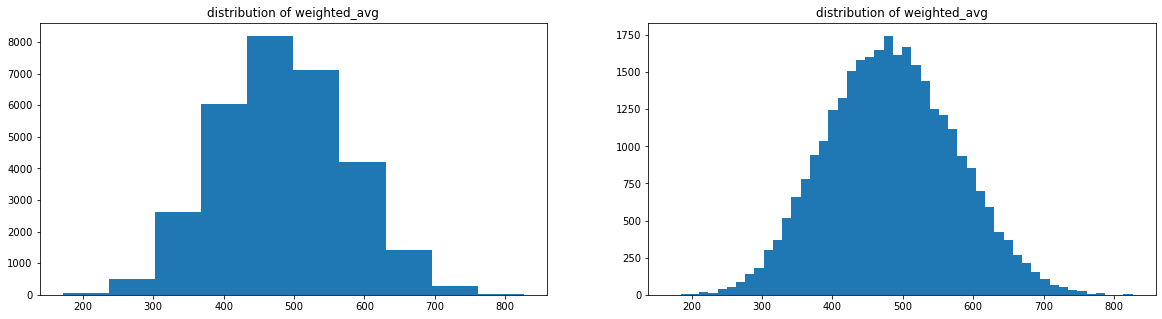

In [54]:
find_dist(df,'weighted_avg')

> The distribution of weighted average of student is unimodal and it follows a normal distribution with the peak around 500

### What's the pattern of distribution among home related variable concerning the students?

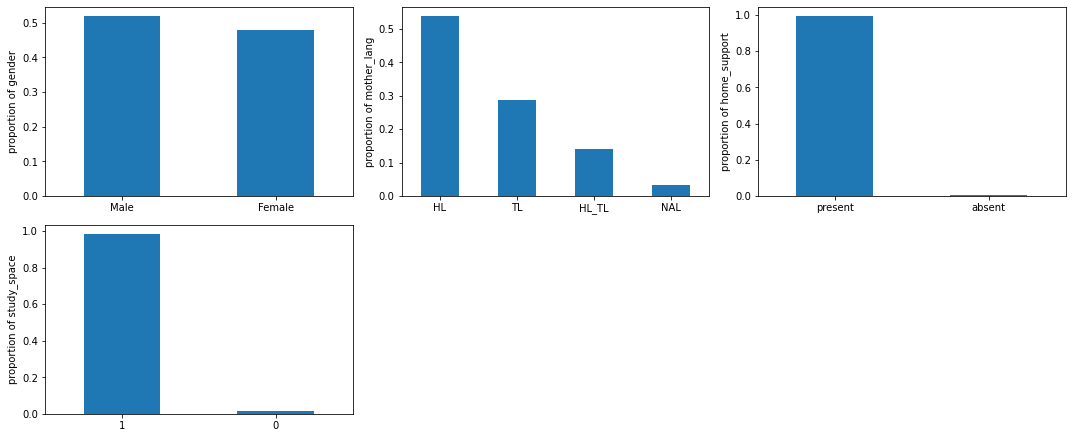

In [55]:
home_cols=['gender', 'mother_lang', 'home_support','study_space']#home related student info columns
plt.figure(figsize=(15, 12))
for col, index in zip(home_cols, range(len(home_cols))):
    plot_data = df[col].value_counts(normalize=True)
    plt.subplot(4, 3, index+1)
    plot_data.plot.bar()
    plt.xticks(rotation=360)
    plt.ylabel('proportion of ' +col)
plt.tight_layout()

>__Notable Observation:__

>Males are marginally more in proportion than the females that participated in the PISA assessment. 

>More than half of the population of mothers of these children speak inherited languages, while nearly one-third of mothers use the same language their ward used to write tests and exams in school. Another category speaks both inherited and test language at home. However, the knowledge of the language used to communicate with their children at home is unclear.

>Of the total, about 98% of students receive support from at least one person at home. Home support usually comes from family members or relatives

>Majority of the students have study space at home for their academic gains.

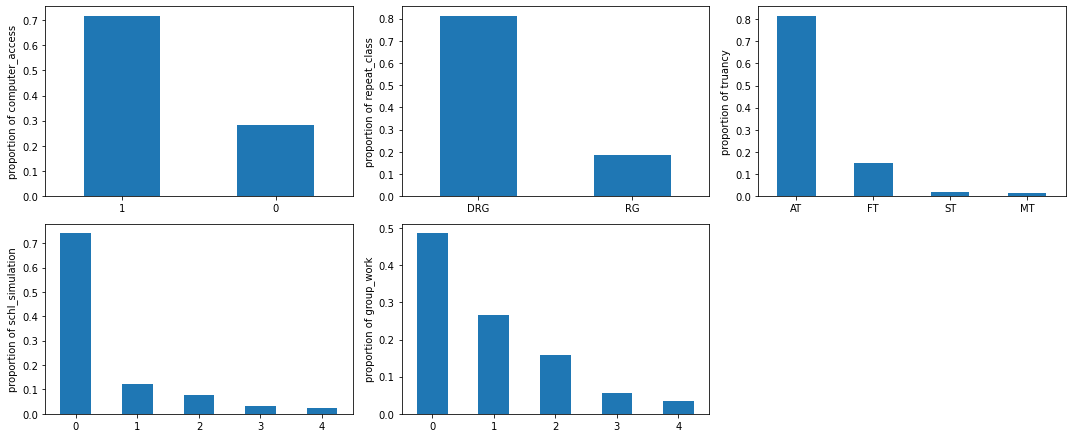

In [56]:
shl_cols=['computer_access','repeat_class','truancy', 'schl_simulation', 'group_work']# school related  student columns
plt.figure(figsize=(15, 12))
for col, index in zip(shl_cols, range(len(shl_cols))):
    plot_data = df[col].value_counts(normalize=True)
    plt.subplot(4, 3, index+1)
    plot_data.plot.bar()
    plt.xticks(rotation=360)
    plt.ylabel('proportion of ' +col)
    plt.tight_layout()

__Observations:__
>Nearly 70% of the students have access to computers be it desktops, portable laptops, or tablets in their school.

> About 11% of the student population have repeated at least a grade since they have been enrolled.

>About 80% of students made full attendance in school while the remaining 20% skipped classes at least once

>Students  who got involved in simulations and group work in school outweigh others who do not

>

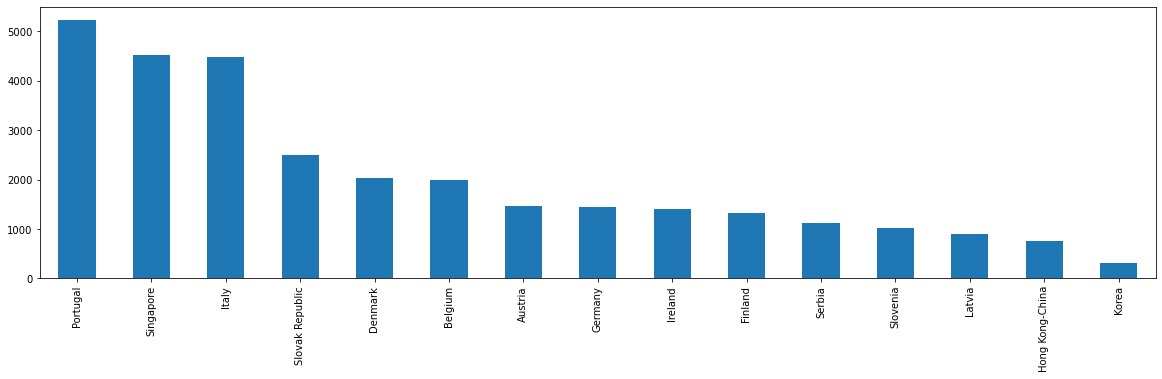

In [57]:
plt.figure(figsize=[20,5])
plt.subplot(1,1,1)
df.country.value_counts().plot(kind='bar')
# plt.xticks(rotation=90)
plt.show()

>Children that were assessed were from different nationalities and there was no equal representation 

### Bivariate
<a id="bi"><a/>
***

### Distribution of scores according to gender

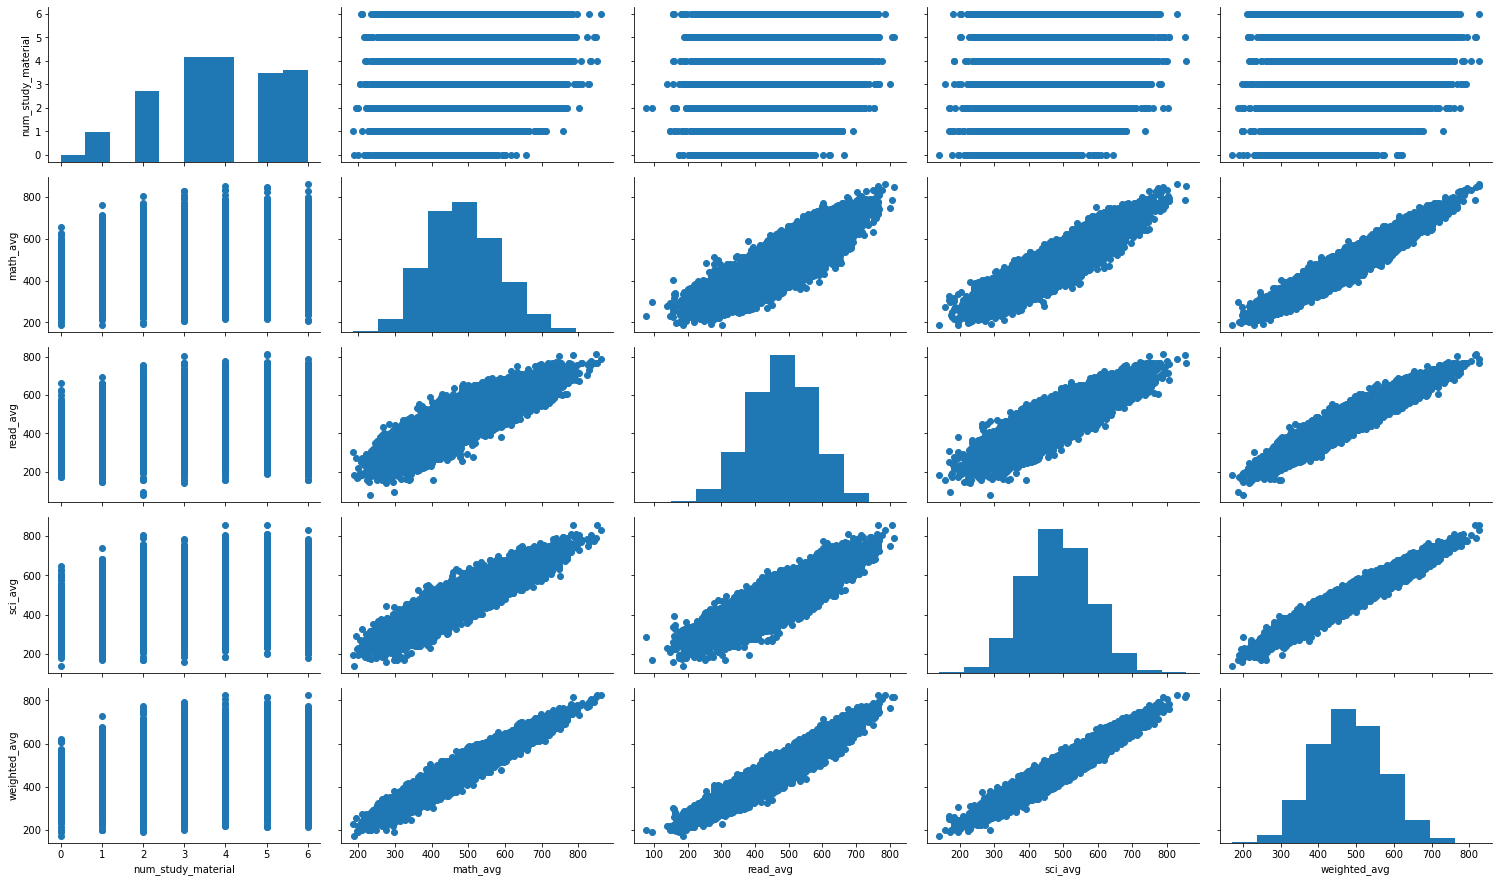

In [58]:
numeric_var=["num_study_material","math_avg","read_avg","sci_avg",'weighted_avg']
g = sns.PairGrid(data=df[numeric_var],aspect=1.7)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

>The plausible weighted average of students' scores in all three modules appears to have a strong positive correlation with the ancestral variables as expected. More interestingly, the number of study materials in possession by students appears to also positively correlate with the student's score. because num_study_materials is a discrete numeric variable, Person correlation will not suffice. Hence another visualization and a box plot will help to get a clearer sense of relationships that exist between them.

In [59]:
# sns.heatmap(df[numeric_var].corr(),annot=True,fmt='.2f',cmap='vlag_r', vmin=-1, vmax=1);

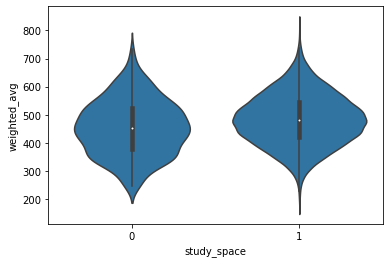

In [60]:
sns.violinplot(data= df, x='study_space', y='weighted_avg', color=sns.color_palette()[0], fliersize=0);

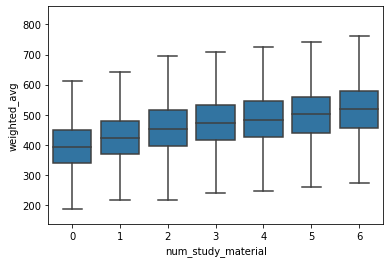

In [61]:
sns.boxplot(data= df, x='num_study_material', y='weighted_avg', color=sns.color_palette()[0], fliersize=0);

> The graph now shows clearly that the number of study materials positively correlates well with the weighted average score. This indicates that students who have more study materials perform better than those who have less or do not have at all. Does this relationship exist across the board or does it varies from one-course module to the other?

>Visualizing the relationship between the number of study materials with each math, reading, and science.

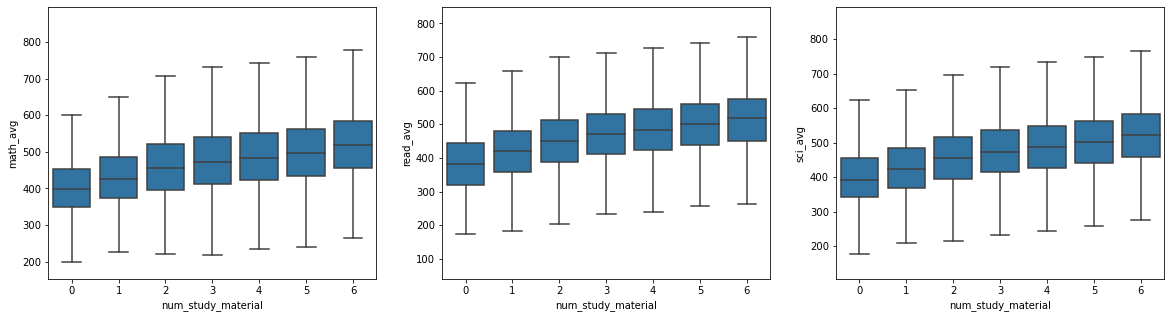

In [62]:
scores=["math_avg","read_avg","sci_avg"]
plt.figure(figsize=[20,5])

for index,col in enumerate(scores):
    # sample_df = df.sample(500)
    # x_val = sample_df.num_study_material.astype(float)
    plt.subplot(1,3,index+1)
    sns.boxplot(data= df, x='num_study_material', y=col, color=sns.color_palette()[0], fliersize=0)
    # sns.regplot(data=sample_df,x = x_val,y=col,x_jitter=0.3,scatter_kws={"alpha":0.09})

> The relationship is pretty much across board as shown in the box plots above. Students with more study materials performed better irrespective of the module

### What's the distribution of scores among students that engage in group work?

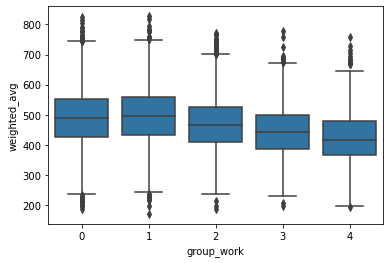

In [63]:
base =sns.color_palette()[0]
sns.boxplot(data=df,x='group_work',y="weighted_avg",color=base);

>__Observation:__

> students who don't participate in group work at all have a mean score of around 480. Meanwhile, the student who participated in group work once or twice a month led those who did not by a mere margin. Beyond this, however, performances tend to dwindle as the students get themselves more involved in group activities. This suggests that a certain degree of group work is beneficial to the students. Frequent group activity as portrayed in the visualization may have an adverse effect on student performance probably they become so much reliant on it that seek to be more independent.

>An understanding of this relationship in individual course modules will give more clarification.

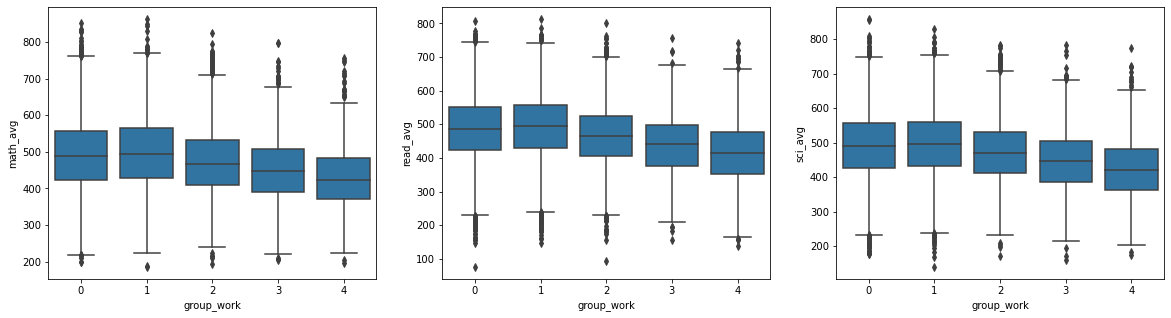

In [64]:
base=sns.color_palette()[0]
plt.figure(figsize=[20,5])
for i,v in enumerate(scores):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='group_work',y=v,color=base);

> A similar pattern is observed in the 3 modules where too frequent group work tends to harm plausible math, reading, and science score.
>Group work is outrightly not a bad influence on academic performance, a measure of it is required to impact success positively 

### What's the distribution of student score involved in simulation in school?

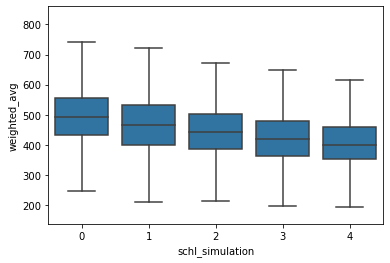

In [65]:
sns.boxplot(data=df,x='schl_simulation',y='weighted_avg',color=base,fliersize=0);

> Clearly, teaching student with simulations in school tend not to improve student weighted average score.

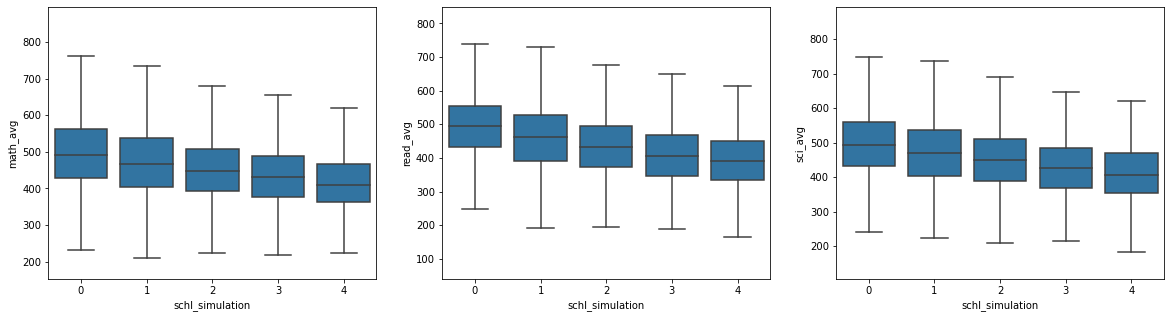

In [66]:
base=sns.color_palette()[0]
plt.figure(figsize=[20,5])
for i,v in enumerate(scores):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='schl_simulation',y=v,color=base,fliersize=0);

>A similar pattern is seen in each of the modules. Students' scores decrease as the frequency of simulation in school increases. 

### How are students who received home support different from those who did not?

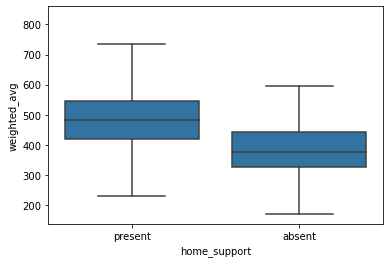

In [67]:
sns.boxplot(data=df,x='home_support',y='weighted_avg',color=base,fliersize=0);

>The median weighted average score of students who have at least somebody at home to support them is around 470, while the ones who did not receive from anyone is about 480. This clearly shows that home support is good for children and it has a positive influence on their academic performances.

>The graph displays a general overview. Could there be something different drilling down to the course modules one by one?

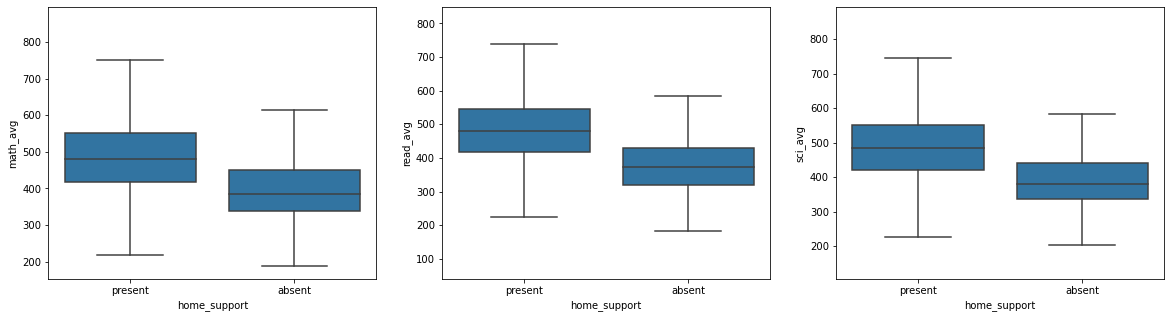

In [68]:
base=sns.color_palette()[0]
plt.figure(figsize=[20,5])
for i,v in enumerate(scores):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x='home_support',y=v,color=base,fliersize=0);

>

> It is quite certain that students who receive support from home performed better across the 3 modules compared to students who do not enjoy such privilege

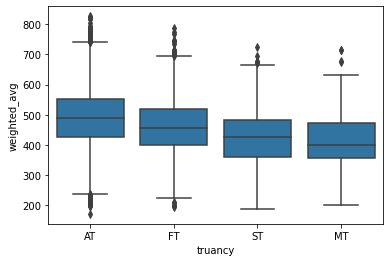

In [69]:
sns.boxplot(data=df,x='truancy',y='weighted_avg',color=base);

> As expected, the score decreases with an increase in the frequency of truancy. Those with 100% attendance performed the best, while the score decreased depending on how frequently the student skipped classes. Students who skipped classes sometimes have lesser scores comapred to the student who was away from school a few times. It can also be seen that children who skipped classes the most scored the least.

##### Are truants underperforming because they skipped classes or the study material needed are not readily available to them?

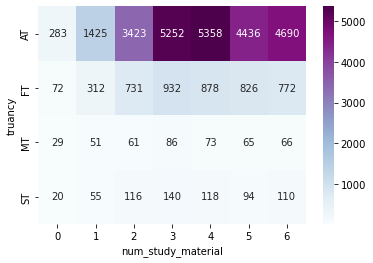

In [70]:
test = df.groupby(['truancy', 'num_study_material'])['truancy'].size()
test = test.reset_index(name = 'count_of_truants')
test = pd.pivot(data= test, index='truancy', columns='num_study_material', values='count_of_truants')
sns.heatmap(data=test, annot=True, fmt='.0f', cmap='BuPu',);

> Broadly speaking, it appears that truants also do not have study material as much as students with 100% attendance. It is also interesting to see that number of study materials decreases with truancy. Children who skipped class the most have the least amount of study materials. Those who cut classes sometimes also have a reduced amount of materials compared to those who were away from school a few times

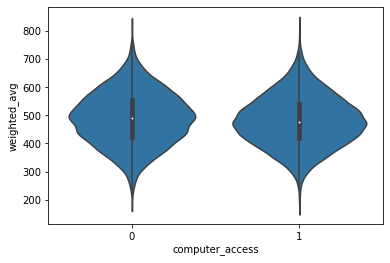

In [71]:
sns.violinplot(data=df,x='computer_access',y='weighted_avg',color=base);

> There is no significant difference between those who have access to a computer in school and those who do not. 

### Multivariate analysis
***
<a id="multi"><a/>

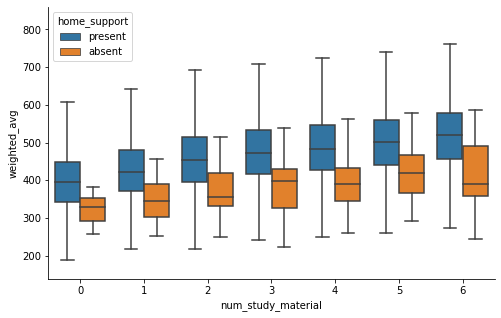

In [72]:
plt.figure(figsize=(8, 5))
sns.boxplot(data= df, x='num_study_material', y='weighted_avg', hue='home_support', fliersize=0);
sns.despine()

>Generally, the graph of weighted average against the number of study materials experienced an upward trend. A third variable, home support was added to show the distinction between those who enjoy the privilege of someone being there for them at home whilst taking into account the number of study materials they have in possession. It is clear from the chart that the combined effect of having home support and an increased number of study materials yielded a higher average score among others.

In [73]:
col=["gender","num_study_material","home_support","group_work","schl_simulation","study_space"]
def grid_pointplot(df,col,y):
    plt.figure(figsize=(15, 8))
    for i,v in enumerate(col):
        plt.subplot(int(len(col)/3),3,i+1)
        sns.pointplot(data=df, x=v, y=y, hue='truancy', linestyles='', dodge=0.4, palette='Blues_r');
    plt.tight_layout()

#### Did truants perform very low compared to others because they skipped classes alone or something more?

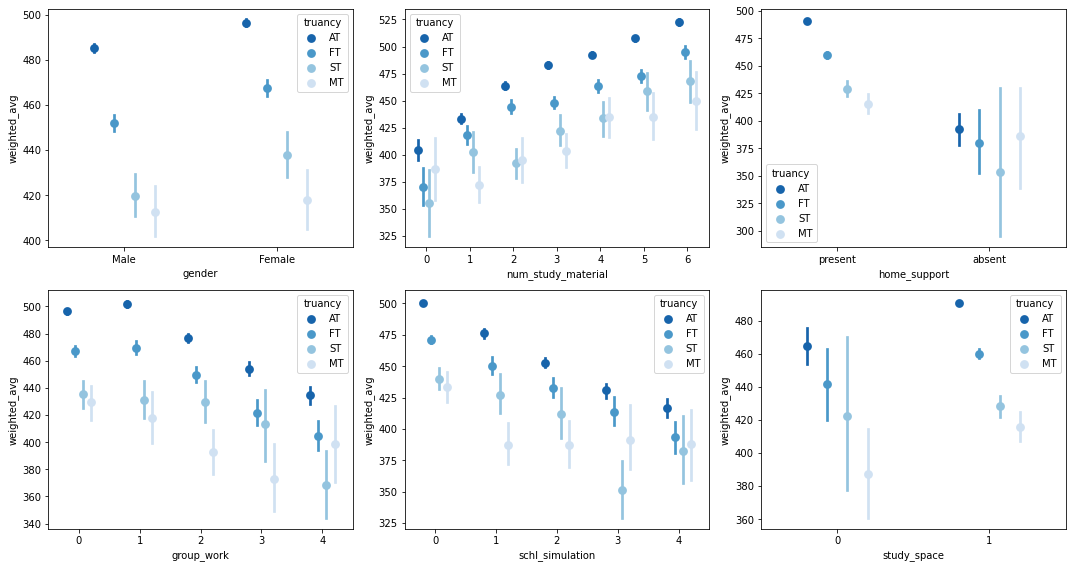

In [74]:
grid_pointplot(df,col,'weighted_avg')

>__Notable observations:__
>- Truants performed very little compared to others irrespective of the gender
>- Children that made 100% attendance in school and at the same fall in the categorial of those who have 0-1 study material did not display so much difference with those who skipped class that has a similar number of study materials. When all students with no material are being grouped i.e putting them in similar conditions, children that belong to the category of those who skipped classes tend to compete with those who skipped classes some times and a few times. The student with full attendance only outpaced them by a mere margin.
>- Again a similar pattern is noticeable among truants that skipped classes the most when they are evaluated for the kind of support they receive from home. The performances of those chronic truants cannot be underrated as they are very much competitive among those who don't enjoy home support. Perhaps, not receiving support from home is the reason for being truant in the first place.

>As earlier discovered, excessive group work hurts student performance. Here, chronic truants, who got involved in group work the most seem to have benefitted more from it compared to others.

>- Chronic truants who got involved in simulation the most seem to have benefitted more from it compared to others.

>- Having a study space or not did seem to have helped the truants in any way.




#### Mathematics exploration

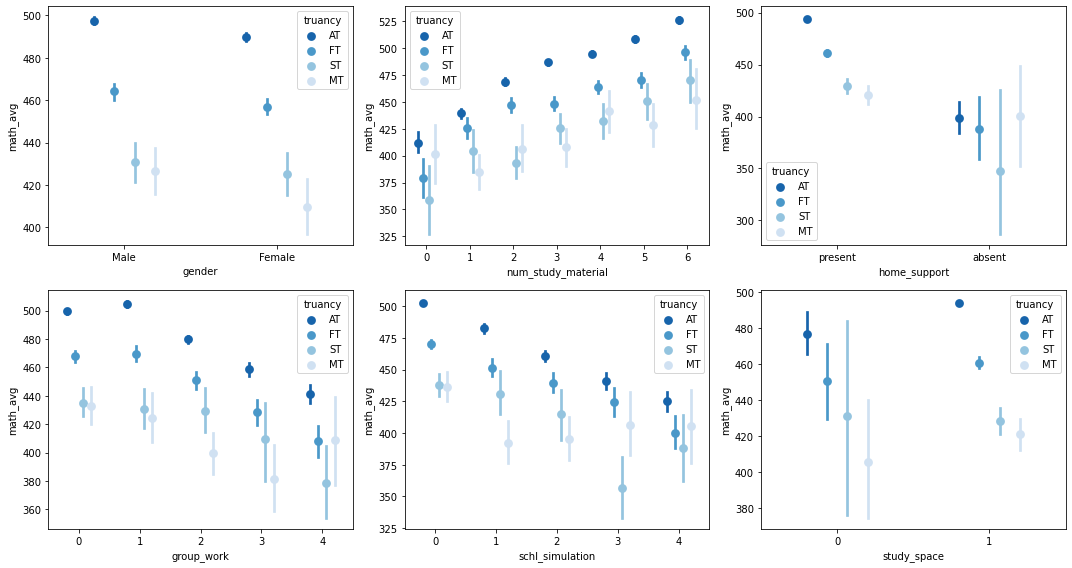

In [75]:
grid_pointplot(df,col,'math_avg')

> Displays similar pattern as in the weighted average

#### Read score exploration

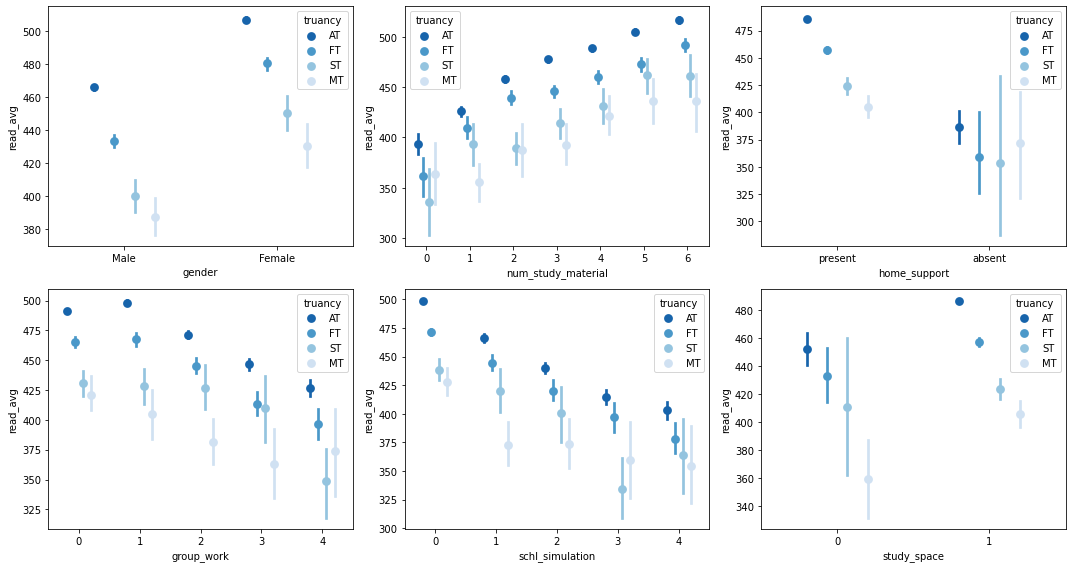

In [76]:
grid_pointplot(df,col,'read_avg')

>Displays similar pattern as in the weighted average

#### Science score exploration

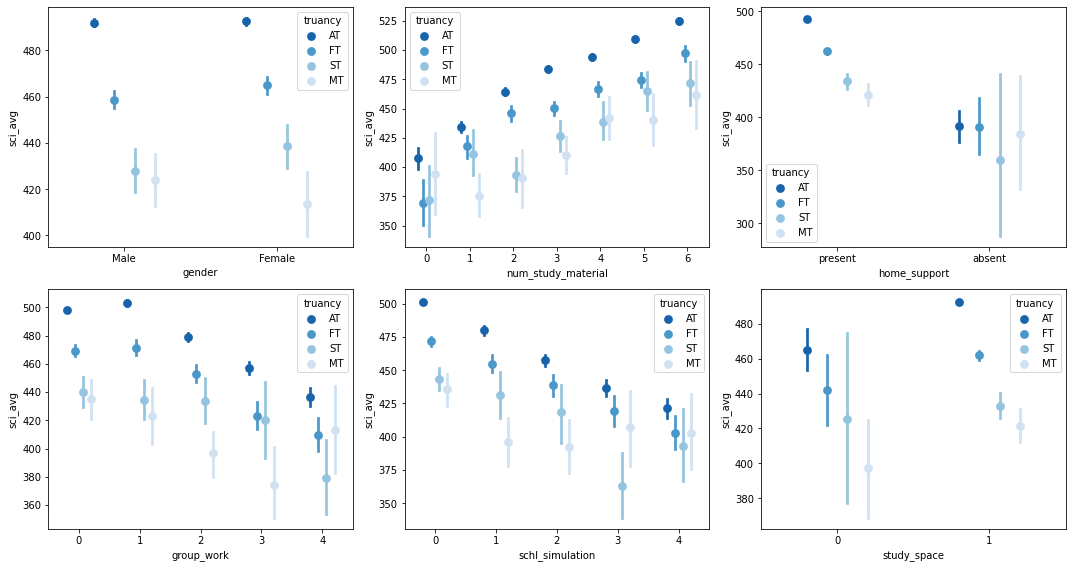

In [77]:
grid_pointplot(df,col,'sci_avg')

>Displays similar pattern as in the weighted average

# Conclusion
***
<a id="con"><a/>

Beginning from the variables selection to the exploratory phase of the analysis, the goal has been to identify factors at home and in school that influences children's (15- 16 years) performance in PISA assessment.
- All the insights gathered from this exploratory analysis apply to performances in all course modules. There's no significant difference in narrowing it down to individual modules.
- Majority of the students that performed very well in the PISA assessment seem to have benefitted from the support structure at home which might have come from anyone known to their family. In addition, truancy is not common with this group of children that are being supported at home. Home support has resulted to be the number one home factor that influenced weighted average score positively if present.
- The number of study materials which comprise literature, poetry, art, textbooks, technical textbooks, and dictionary possessed by the students was analyzed and interestingly studies show that lack of any of these materials hampers performance. School children with all the six material types scored higher than other students
- The combined effect of having a home support structure and an increased number of study materials yielded a higher average score among others.
- The analysis also revealed that students' performance declined as the frequency of truancy increased in all the 3 modules. Although school children with full attendance performed much better than others by a mean difference between 10 to 50 points, there is no conclusive evidence that truants performed woefully because they skipped classes. When full attendees with no home support and zero study materials were grouped with other truants with a similar condition, studies revealed that chronic truants performed better than those who skipped classes a few times such that full attendees led by a mere margin. This indicates that truants cannot be underrated when subjected to the same condition as other school children

- Group work and simulations in school have also been discovered to be effective largely to an extent. Frequent involvement in these school activities has also shown to have its downside to performance. Furthermore, the truants were observed to have benefited much from frequent involvement in these activities. It is however difficult to say for certain that increased group work and simulation activities in schools hamper children's academic performance because the contents of these activities and the degree of supervision remain largely unknown.  

# Limitations
***
<a id='lim'></a>
- The original dataset contains wealth of attributes, however, the data dictionary denifition is limited. For example weights are associated to each student and to each school because: students and schools in a particular country did not necessarily have the same probability of selection; differential participation rates according to certain types of school or student characteristics required various non-response adjustments. It was difficult to pinpoint the weight in question from the data dictonary.
- The scores used in this analysis are not a true representation of of student abilities, rather they are in form of plausible values  wich are a representation of the range of abilities that a student might reasonably have.

# Recomendations
<a id="recom"><a/>
***

- Frequent group work is not a recipe that work all the time for all students and  as such the contents of activities may need to be revisited and employ high degree of supervison 
- A high degree of support should be given to the identified  chronic truants - book provison and guidance will help them unleash their potential